In [1]:
# Ok task 2.

# Looks like we have a dataset

# Task 2: Diabetes patient records 
# 
# Utilize the provided Diabetes patient records dataset, available [http://archive.ics.uci.edu/dataset/34/diabetes],
# to perform comprehensive patient phenotyping for individuals with diabetes. The goal is to extract valuable insights
# and categorize patients based on their unique clinical characteristics, including but not limited to vitals, 
# eating behaviours, and treatment. Your analysis should aim to provide a detailed understanding of diabetes patient
# profiles within the dataset.

# It seems to be the case that each data file represents a different patient, it has a bunch of datetimes
# and "codes" that represent things that happened to the patient

# "The goal is to extract valuable insights and categorize patients based on their
# unique clinical characteristics, including but not limited to vitals, eating behaviours, and treatment"

#ok, this is a very vague task, lets get into the data

In [2]:
import pandas as pd
import glob
import numpy as np
from pylab import *
import seaborn as sns


In [3]:
alldatafiles = glob.glob("Task 2 Diabetes-Data/data-*")
alldfs=[]
for i in range(len(alldatafiles)):
    alldfs.append(pd.read_csv(alldatafiles[i],delimiter = '\t',names = ["date","time","code","value"]))
    #alldfs[i]["datetime"] = pd.to_datetime(alldfs[i]["date"]+'-'+alldfs[i]['time'])

# OK well there's all the data

###  I'll approach this task as follows: construct a dataframe containing each patient. I'll come up with various phenotypes and categorize each patient based on their data. The final data frame will contain a description of each patient in terms of whatever phenotypes I come up with

In [4]:
# Let's start by constructing our phenotype dataframe and adding in eahc patient ID
phenotypes=pd.DataFrame()
phenotypes["patientid"] = np.arange(70)+1


### The first thing that intrigues me about this data is code 72 -- unspecified special events -- its not clear what that. even is, but my guess would be that it is the kind of thing that would be important for healthcare workers to know. How often does this patient have "special events" that will take up the time of healthcare workers. Presumably, since this is a dataset about diabetes, 'special events' are expected to be negative, and probably an ndicator of poor health

In [5]:
nSpecialEvents=[]

for i in range(len(alldfs)):
    tdf = alldfs[i]
    nSpecialEvents.append(len(tdf.query("code == 72")))
    

In [6]:
# Let's get the fraction of exercse events that are high exercise vs low exercise.

high_exercise=[]
low_exercise=[]
mid_exercise=[]
#For each patient, let's get the total number of exercise events
for i in range(len(alldfs)):
    tdf = alldfs[i]
    total_exercise_events = len(tdf.query("code == 71 or code == 70 or code == 69"))
    high_exercise_events = len(tdf.query("code == 70"))
    mid_exercise_events = len(tdf.query("code == 69"))
    low_exercise_events = len(tdf.query("code == 71"))
    
    # If there are no exercise events just append 0, other
    try:high_exercise.append(high_exercise_events/total_exercise_events)
    except: high_exercise.append(0)
    try:low_exercise.append(low_exercise_events/total_exercise_events)
    except: low_exercise.append(0)
phenotypes['low_exercise']=low_exercise
phenotypes['high_exercise']=high_exercise


In [7]:
# Let's get the mean blood glucose of evrey patient

mean_bg=[]

for i in range(len(alldfs)):
    tdf = alldfs[i]
    
    # Some dfs have text data in the value field, as a 0th approximation lets just 0 those ones
    try:mean_bg.append(np.mean(tdf.query("code == 48 or code == 57 or code == 58 or code == 59 or code == 60 or code == 61 or code == 62 or code == 63 or code == 64")["value"]))
    except:mean_bg.append(0)

# LEt's add that to our phenotype and replace nans and 0s
mean_bg = array(mean_bg)
mean_bg[mean_bg==inf] = 0
phenotypes["mean_bg"]=mean_bg
phenotypes=phenotypes.fillna(0)


In [8]:
# Let's next categorize patients off their meal ingestion

# Let's get the fraction of exercse events that are high exercise vs low exercise.

high_ingestion=[]
low_ingestion=[]
mid_ingestion=[]
#For each patient, let's get the total number of exercise events
for i in range(len(alldfs)):
    tdf = alldfs[i]
    total_ingestion_events = len(tdf.query("code == 66 or code == 67 or code == 68"))
    high_ingestion_events = len(tdf.query("code == 67"))
    mid_ingestion_events = len(tdf.query("code == 66"))
    low_ingestion_events = len(tdf.query("code == 68"))
    
    # If there are no exercise events just append 0, other
    try:high_ingestion.append(high_ingestion_events/total_ingestion_events)
    except: high_ingestion.append(0)
    try:low_ingestion.append(low_ingestion_events/total_ingestion_events)
    except: low_ingestion.append(0)
phenotypes['low_ingestion']=low_ingestion
phenotypes['high_ingestion']=high_ingestion

In [10]:
# Let's compute the average daily insulin dosage, and the average daily number of doses

all_avg_daily_number_insulin_shots=[]
all_avg_daily_insulin_dose=[]
for i in range(len(alldfs)):
    tdf = alldfs[i]
    
    
    avg_daily_insulin_shots=mean(tdf.query("code == 33 or code == 34 or code == 35").groupby('date').count().code)
    
    # The time-constrained test-environment way of dealing with text data in a numerical field
    try:avg_daily_insulin_dose =mean(tdf.query("code == 33 or code == 34 or code == 35").groupby('date').mean().value)
    except:avg_daily_insulin_dose = 0
    
    all_avg_daily_number_insulin_shots.append(avg_daily_insulin_shots)
    all_avg_daily_insulin_dose.append(avg_daily_insulin_dose)
    
phenotypes['avg_daily_nshots']=all_avg_daily_number_insulin_shots
phenotypes['avg_daily_dose']=all_avg_daily_insulin_dose
phenotypes=phenotypes.fillna(0) # I don't want to deal with NaNs right now

## Ok, at this point we've constructed a dataframe that includes a fair amount of data about the overall treatment and well being of each patient. Now, the idea is to use it to get some"Insights" that are valuable.

### The first thing I'd like to look at is patients with a high number of "special events"
### It seems likely that special events that are worth reporting on are related to  negative health outcomes

In [11]:
phenotypes["nspecial"] = nSpecialEvents
phenotypes.query("nspecial >= 10")

,patientid,low_exercise,high_exercise,mean_bg,low_ingestion,high_ingestion,avg_daily_nshots,avg_daily_dose,nspecial
10,11,0.25,0.25,145.462687,0.0,0.760000,3.892857,15.415476,10
11,12,0.25,0.50,161.382022,0.0,0.956522,3.536585,15.692683,11


### Two patients in particular have had over 10 special events -- these patients are likely at high risk for more special events Can we create a prediction scheme for who is at risk for special events?. I notice that both of these patients have a high ingestion level and a daily insulin dosage around 15.

### Can we predict the risk of special events based on these two metrics?

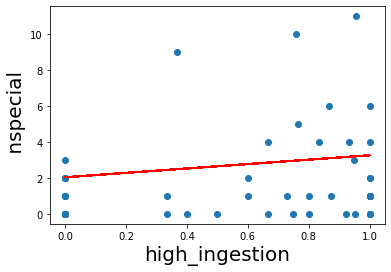

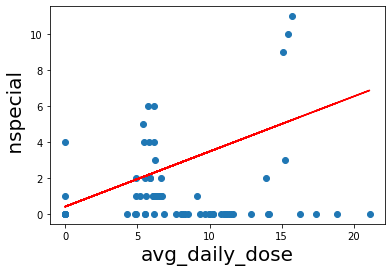

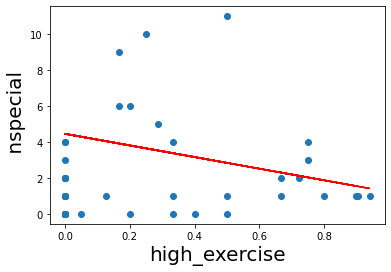

In [12]:

p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_ingestion"],phenotypes[phenotypes.high_exercise>0]["nspecial"],1)
Y_pred = p[1] + p[0]*phenotypes["high_ingestion"]

plot(phenotypes["high_ingestion"],phenotypes["nspecial"],"o")
plot(phenotypes["high_ingestion"],Y_pred,color = 'red',label = "Regression Line")
xlabel("high_ingestion",fontsize = 20)
ylabel(" nspecial",fontsize = 20)

show()


p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["avg_daily_dose"],phenotypes[phenotypes.high_exercise>0]["nspecial"],1)
Y_pred = p[1] + p[0]*phenotypes["avg_daily_dose"]

plot(phenotypes["avg_daily_dose"],phenotypes["nspecial"],"o")
plot(phenotypes["avg_daily_dose"],Y_pred,color = 'red',label = "Regression Line")

xlabel("avg_daily_dose",fontsize = 20)
ylabel(" nspecial",fontsize = 20)
show()

p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["nspecial"],1)
Y_pred = p[1] + p[0]*phenotypes["high_exercise"]

plot(phenotypes["high_exercise"],phenotypes["nspecial"],"o")
plot(phenotypes["high_exercise"],Y_pred,color = 'red',label = "Regression Line")
xlabel("high_exercise",fontsize = 20)
ylabel(" nspecial",fontsize = 20)

show()

### There is actually a reaonably high correlation between avg_daily dose and the number of special events. We can probably use this to classify patients at risk of a special event. Let's try the following: For all patients, divide the number of recorded days by the number of special events to determine the number of special events per day -- this is probably a better metric -- it didn't occur to me before that there may be different numbers of days recorded for different patients.

In [13]:
ndays=[]
for i in range(len(alldfs)):
    tdf = alldfs[i]
    ndays.append(tdf.date.nunique())
    
phenotypes["ndays"] = ndays
phenotypes["nspec_per_day"] = phenotypes["nspecial"]/phenotypes["ndays"]



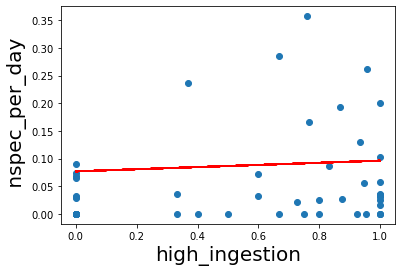

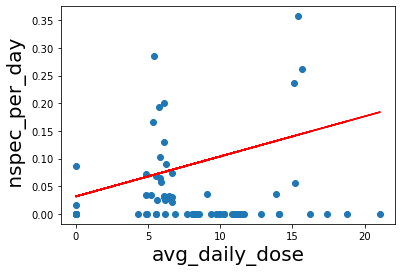

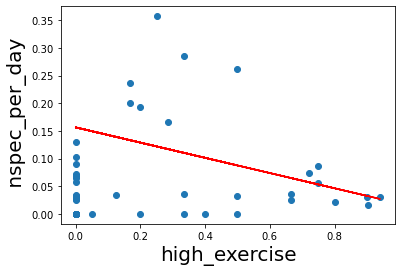

In [14]:
# Let's try plotting again but with the number of special events per day instead of total number
p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_ingestion"],phenotypes[phenotypes.high_exercise>0]["nspec_per_day"],1)
Y_pred = p[1] + p[0]*phenotypes["high_ingestion"]

plot(phenotypes["high_ingestion"],phenotypes["nspec_per_day"],"o")
plot(phenotypes["high_ingestion"],Y_pred,color = 'red',label = "Regression Line")
xlabel("high_ingestion",fontsize = 20)
ylabel(" nspec_per_day",fontsize = 20)

show()

# Let's try plotting again but with the number of special events per day instead of total number
p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["avg_daily_dose"],phenotypes[phenotypes.high_exercise>0]["nspec_per_day"],1)
Y_pred = p[1] + p[0]*phenotypes["avg_daily_dose"]

plot(phenotypes["avg_daily_dose"],phenotypes["nspec_per_day"],"o")
plot(phenotypes["avg_daily_dose"],Y_pred,color = 'red',label = "Regression Line")
xlabel("avg_daily_dose",fontsize = 20)
ylabel(" nspec_per_day",fontsize = 20)

show()


p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["nspec_per_day"],1)
Y_pred = p[1] + p[0]*phenotypes["high_exercise"]

plot(phenotypes["high_exercise"],phenotypes["nspec_per_day"],"o")
plot(phenotypes["high_exercise"],Y_pred,color = 'red',label = "Regression Line")
xlabel("high_exercise",fontsize = 20)
ylabel(" nspec_per_day",fontsize = 20)

show()


In [15]:
phenotypes["avg_daily_dose"]

0      9.346324
1      0.000000
2      5.841026
3      5.594017
4      5.540650
        ...    
65    17.391667
66    21.084028
67    14.084337
68     0.000000
69     5.563388
Name: avg_daily_dose, Length: 70, dtype: float64

### OK, there is still reasonably high correlation between average daily dose and amount of exercise. These regressions lines give us the probability of a patient having a special event on any given day as a function of X (either avg-daily dose or high_exercise)
### This is actually an important insight -- we can categorize patients as being high or low risk based on their excercise and daily dose

## Let's construct a regressor and use it to predict a patients probabiltiy of having a special event on a given day based on these two features

Text(0.5, 1.0, 'Two Feature Special Event predictions (high exercise and avg daily dosage)')

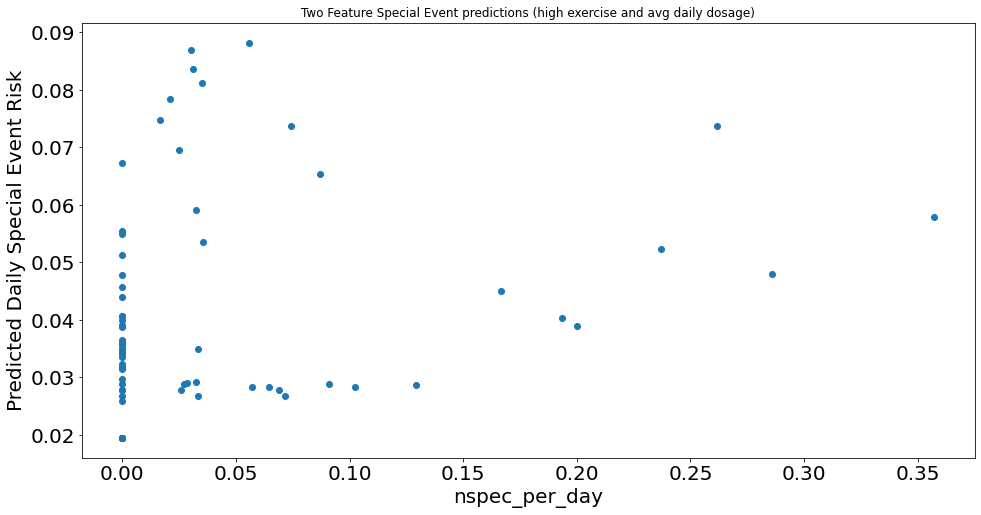

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# This is a two feature linear regression to predict the probability of having a special event on any given day
X = phenotypes[["avg_daily_dose","high_exercise"]]
Y = phenotypes["nspec_per_day"]
regr.fit(X, Y)
predicted_nspec_per_day=regr.predict(phenotypes[["avg_daily_dose","high_exercise"]])

phenotypes["daily_nspec_risk"] = predicted_nspec_per_day


# Just for fun, let's plot our predicted special event risk against the number of special events per day

figure(figsize = (16,8))

plot(phenotypes["nspec_per_day"],phenotypes["daily_nspec_risk"],"o")

xlabel("nspec_per_day",fontsize = 20)
ylabel("Predicted Daily Special Event Risk",fontsize = 20)

_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

title("Two Feature Special Event predictions (high exercise and avg daily dosage)")

### Obviously there are many patients who never have had any special events, this skews the data in a large way. If we do assume that the features in the data are relevant for sepcial events, then we have quantified their risk above.

### Really, we can build a regressor to use all the feature's we have computed to predict risk, not just the two we used above. Even features with low correlation may contribute something. Let's just try it and see waht we get.

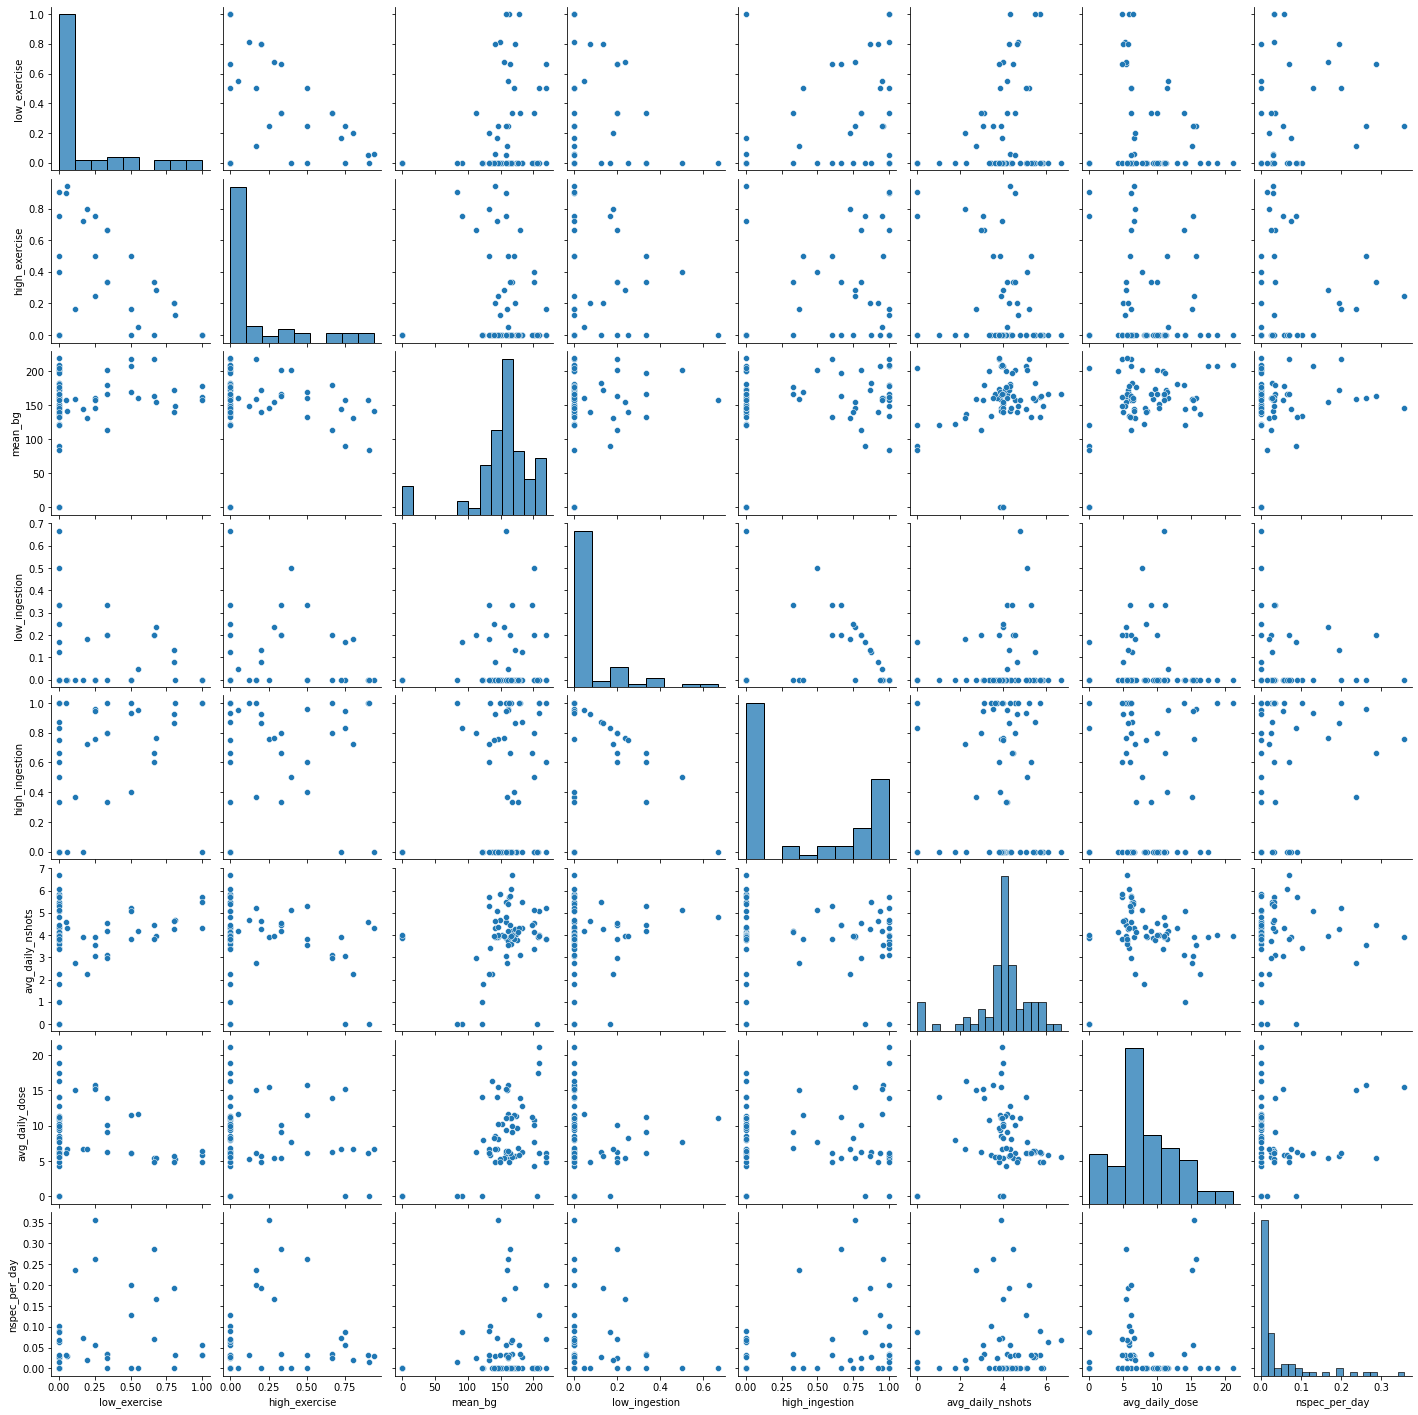

In [17]:
# First of all, what do the relationships between all of these variables look like?


sns.pairplot(phenotypes[['low_exercise','high_exercise','mean_bg','low_ingestion','high_ingestion','avg_daily_nshots','avg_daily_dose','nspec_per_day']])

Text(0.5, 1.0, '7 Feature Special Event predictions (high exercise and avg daily dosage)')

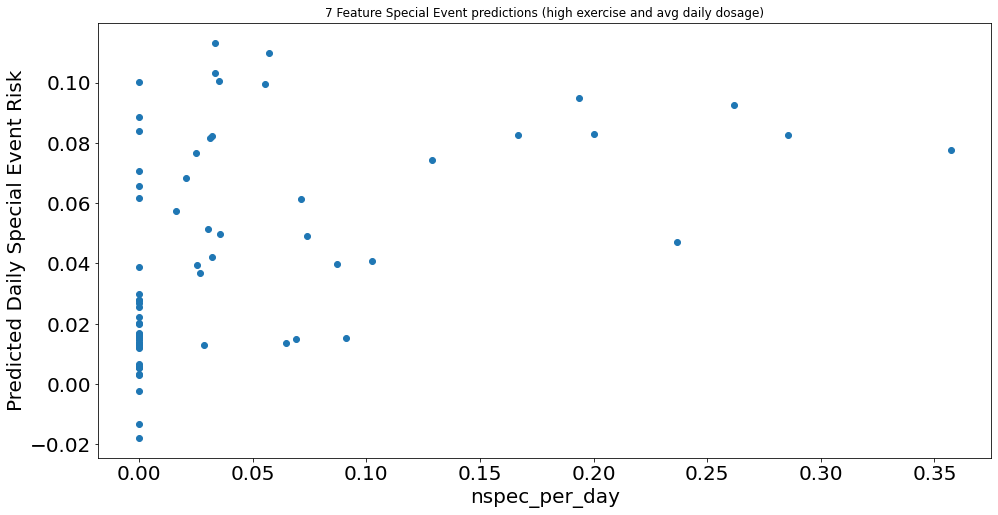

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# This is a N feature linear regression to predict the probability of having a special event on any given day
X = phenotypes[['low_exercise','high_exercise','mean_bg','low_ingestion','high_ingestion','avg_daily_nshots','avg_daily_dose']]
Y = phenotypes["nspec_per_day"]
regr.fit(X, Y)
predicted_nspec_per_day=regr.predict(X)

phenotypes["7_feature_daily_nspec_risk"] = predicted_nspec_per_day


# Just for fun, let's plot our predicted special event risk against the number of special events per day

figure(figsize = (16,8))

plot(phenotypes["nspec_per_day"],phenotypes["7_feature_daily_nspec_risk"],"o")

xlabel("nspec_per_day",fontsize = 20)
ylabel("Predicted Daily Special Event Risk",fontsize = 20)

_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

title("7 Feature Special Event predictions (high exercise and avg daily dosage)")

### To be honest, this doesn't appear to be significantly better than our two feature predictor, infact, we get predictions of negative probability
### Let's move on

In [19]:
#I'm interested in looking at overall correlations between various metrics that are likely to be related

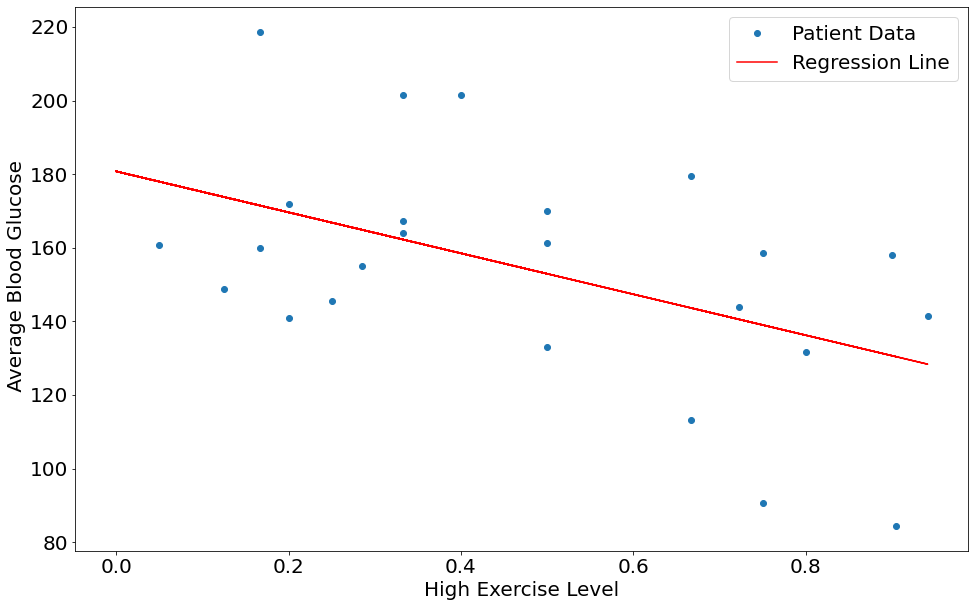

In [20]:
p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["mean_bg"],1)
Y_pred = p[1] + p[0]*phenotypes["high_exercise"]
                      
figure(figsize = (16,10))
plot(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["mean_bg"],"o",label = 'Patient Data')
plot(phenotypes["high_exercise"],Y_pred,color = 'red',label = "Regression Line")
xlabel("High Exercise Level",fontsize = 20)
ylabel(" Average Blood Glucose",fontsize = 20)
legend(fontsize = 20)
_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

### It looks like the average blood glucose decreases as a function of increasing exercise level, sounds about right!

### I'm curious if high exercise correlates with high ingestion level -- maybe more calories means more energy?  or maybe more calories means more lethargy?

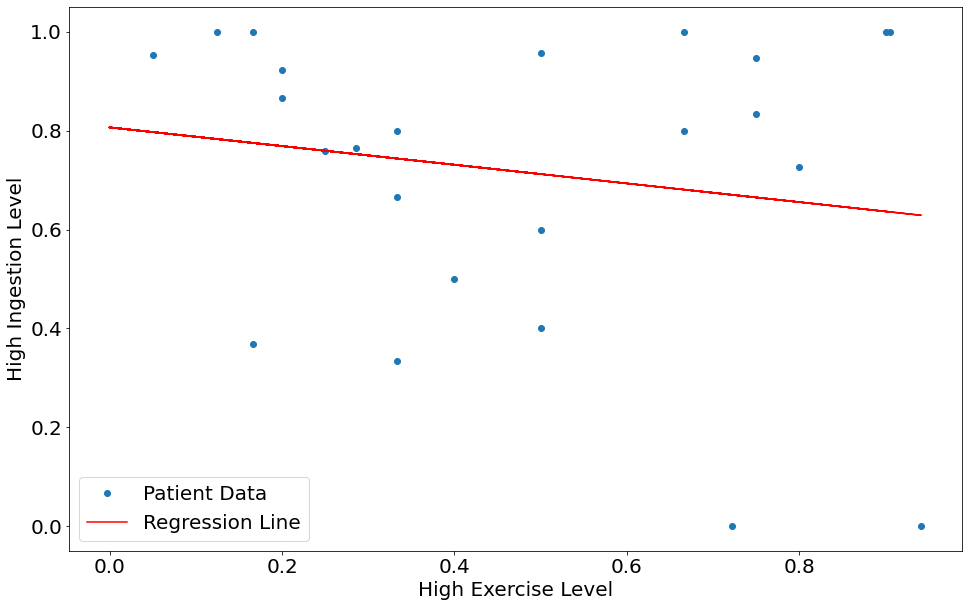

In [21]:
p=np.polyfit(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["high_ingestion"],1)
Y_pred = p[1] + p[0]*phenotypes["high_exercise"]
                      
figure(figsize = (16,10))
plot(phenotypes[phenotypes.high_exercise>0]["high_exercise"],phenotypes[phenotypes.high_exercise>0]["high_ingestion"],"o",label = 'Patient Data')
plot(phenotypes["high_exercise"],Y_pred,color = 'red',label = "Regression Line")
xlabel("High Exercise Level",fontsize = 20)
ylabel("High Ingestion Level",fontsize = 20)
legend(fontsize = 20)
_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

### Looks like lethargy wins

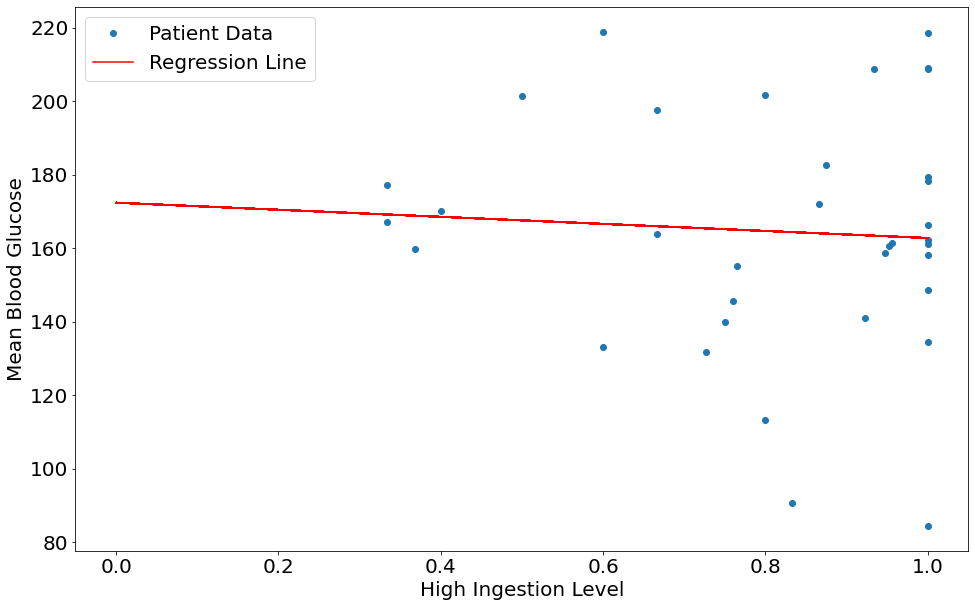

In [22]:
p=np.polyfit(phenotypes[phenotypes.high_ingestion>0]["high_ingestion"],phenotypes[phenotypes.high_ingestion>0]["mean_bg"],1)
Y_pred = p[1] + p[0]*phenotypes["high_ingestion"]
                      
figure(figsize = (16,10))
plot(phenotypes[phenotypes.high_ingestion>0]["high_ingestion"],phenotypes[phenotypes.high_ingestion>0]["mean_bg"],"o",label = 'Patient Data')
plot(phenotypes["high_ingestion"],Y_pred,color = 'red',label = "Regression Line")
ylabel("Mean Blood Glucose",fontsize = 20)
xlabel("High Ingestion Level",fontsize = 20)
legend(fontsize = 20)
_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

### Interstingly, mean blood glucose level doesn't appear to correlate strongly with ingestion level

### I've run out of time now, but I actually really enjoyed this assignment. I'd like to say that the most important insight I've extracted from this data set is a prediction of each patient's risk of having a special event on a given day based on various metrics. Assuming that special events are negative health events such as heart attacks, fainting, blurred vision, extreme dizziness, other things associated with diabetes, this type of prediction could actually be extremely useful for healthcare workers to be able to know preemptively who is at risk of special events, and allot their resources accordingly.

### I'd like to thank you for your time, and end on a final plot of each patients daily risk of a special event

Text(0, 0.5, 'Daily Special Event Risk')

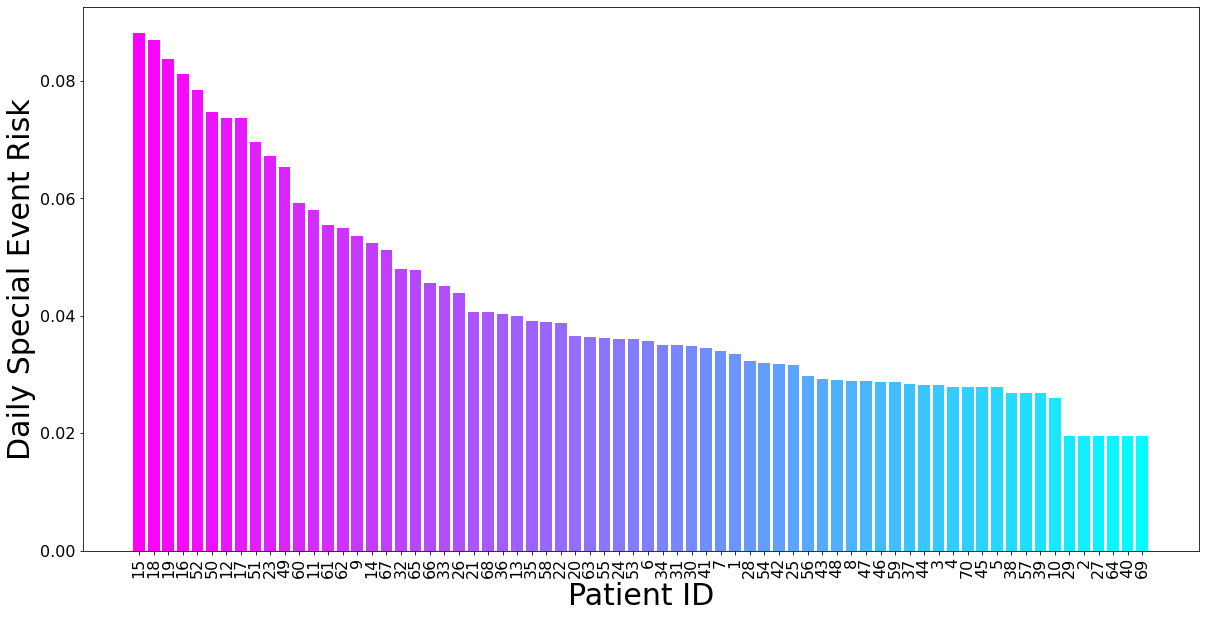

In [23]:
phenotypes=phenotypes.sort_values('daily_nspec_risk',ascending = False)

colors =[]
for i in range(len(phenotypes.daily_nspec_risk)):
    colors.append([(1-i/len(phenotypes.daily_nspec_risk)),(i/len(phenotypes.daily_nspec_risk)),1.])
        
        
figure(figsize = (20,10))
      
bar(phenotypes.patientid.astype(str),phenotypes.daily_nspec_risk,color = colors)

_=yticks(fontsize = 16)
_=xticks(fontsize = 16,rotation = 90)
xlabel("Patient ID",fontsize = 30)
ylabel("Daily Special Event Risk",fontsize = 30)